# 1. Transformer models

## Natural Language Processing (NLP) and Large Language Models (LLMs)

- NLP
  - Focused on understanding related to the human language
  - Understand the context
  - Indentify the grammaticam components
- LLMs
  - AI model trained on large text datasets, like a books, newspapers, etc
  - "Advanced NLP"
- LLM problems
  - Hallucinations: generating things that do not exist
  - Bias: generating things that are only in the documents/data that the model was trained on
  - Context windows: the data that the model has access to is limited. Old models: 4K tokens. New models: 128K tokens

## Transformers, what can they do?

- NLP, computer vision, audio processing
- Created in 2017
- Attention is all you need: https://arxiv.org/pdf/1706.03762
- Self-attention: focus on relevant parts of the input

### Examples

- Pipeline: sentiment analysis
- Pre-trained model, fine-tuned to sentiment analysis in English

In [1]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", device = -1)
result = classifier("I've been waiting for a HuggingFace course my whole life.")
print(result)

/home/rafael/Documentos/github/llm-course-hugging-face/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9598050713539124}]


In [2]:
import torch

print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

True
NVIDIA GeForce RTX 2060


### Zero-shot classification

- Text haven't been labelled before

In [ ]:
classifier = pipeline("zero-shot-classification", device = -1)
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


### Text generation

In [ ]:
generator = pipeline("text-generation", device = -1)
generator("In this course, we will teach you how to")

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "In this course, we will teach you how to use the new PUSH feature, how to create a new project, and how to get a working PUSH project to work.\n\nPlease note that the following section will not be required, but will be helpful for newcomers. You will also learn how to create projects using PUSH.\n\nThe first time you build to a new PUSH project, you have to change your PUSH configuration to get the new project to work properly. This is done by changing your PUSH configuration in the following way:\n\nMake sure that the project you are working on is called 'My Project'.\n\nMake sure that you have a list of all projects that you want to build from.\n\nCreate a new PUSH project.\n\nBuild the new project using the following command:\n\npushing\n\nCreate a new PUSH project using the following command:\n\npushing\n\nThe previous step is to create a new PUSH project with your project name. In this case, we will create the PUSH project in /Users/yourusername/projects.\n\nN

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation", model="HuggingFaceTB/SmolLM2-360M", device = -1)
generator(
    "In this course, we will teach you how to",
    max_length=30,
    num_return_sequences=2,
)

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'In this course, we will teach you how to build your own robot to help around the house. You will learn how to use a robot controller to navigate through your house, and how to use a controller to move the robot around the house. This course will also teach you how to use a robot to play games and how to control it using an iOS app.\n\nYou will learn how to use an Arduino microcontroller board and how to program it to control the robot. You will learn how to use Python and C++ to program the robot. You will learn how to use an ultrasonic sensor to detect obstacles and how to use a motor to move the robot. You will learn how to use a computer vision library to detect obstacles and use it to navigate around the house.\n\nYou will also learn how to use the internet to control the robot from a remote location, and how to use a website to control the robot from your computer. You will also learn how to use an Android app to control the robot from your phone.\n\nYou will 

### Mask filling

Fill a specific word in a sentence, given by `<mask>`

- Score: probability 
- Token: id of the word
- Token_str: word itself
- Sequence: the entire sentence with the word filled

In [ ]:
unmasker = pipeline("fill-mask", device = -1)

unmasker("This course will teach you all about <mask> models.", top_k=2)

No model was supplied, defaulted to distilbert/distilroberta-base and revision fb53ab8 (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


[{'score': 0.19619743525981903,
  'token': 30412,
  'token_str': ' mathematical',
  'sequence': 'This course will teach you all about mathematical models.'},
 {'score': 0.04052726551890373,
  'token': 38163,
  'token_str': ' computational',
  'sequence': 'This course will teach you all about computational models.'}]

### Named entity recognition (NER)

- Indentify entities in text
  - Person, location, organization, dates, values, etc
- Examples:
  - PER → Pessoa
  - ORG → Organização
  - LOC → Localidade geopolítica
  - DATE → Datas
  - TIME → Horas
  - MONEY → Valores monetários
  - PERCENT → Percentuais
- Steps
  - Pre-processing
  - NLP model
  - Classification
    - Exemplo:
      - "Steve" → Beginning-PER
      - "Jobs" → Inside-PER
      - "Apple" → Beginning-ORG

In [ ]:
ner = pipeline("ner", grouped_entities=True, device = -1)

ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
/home/rafa

[{'entity_group': 'PER',
  'score': np.float32(0.9981694),
  'word': 'Sylvain',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': np.float32(0.9796019),
  'word': 'Hugging Face',
  'start': 33,
  'end': 45},
 {'entity_group': 'LOC',
  'score': np.float32(0.9932106),
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

In [ ]:
ner = pipeline("ner", grouped_entities=False, device = -1)

ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
/home/rafa

[{'entity': 'I-PER',
  'score': np.float32(0.99938285),
  'index': 4,
  'word': 'S',
  'start': 11,
  'end': 12},
 {'entity': 'I-PER',
  'score': np.float32(0.99815494),
  'index': 5,
  'word': '##yl',
  'start': 12,
  'end': 14},
 {'entity': 'I-PER',
  'score': np.float32(0.99590707),
  'index': 6,
  'word': '##va',
  'start': 14,
  'end': 16},
 {'entity': 'I-PER',
  'score': np.float32(0.99923277),
  'index': 7,
  'word': '##in',
  'start': 16,
  'end': 18},
 {'entity': 'I-ORG',
  'score': np.float32(0.9738931),
  'index': 12,
  'word': 'Hu',
  'start': 33,
  'end': 35},
 {'entity': 'I-ORG',
  'score': np.float32(0.976115),
  'index': 13,
  'word': '##gging',
  'start': 35,
  'end': 40},
 {'entity': 'I-ORG',
  'score': np.float32(0.9887976),
  'index': 14,
  'word': 'Face',
  'start': 41,
  'end': 45},
 {'entity': 'I-LOC',
  'score': np.float32(0.9932106),
  'index': 16,
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

### Question Answering

In [ ]:
# Doesn't work without the context parameter

question_answerer = pipeline("question-answering", device = -1)

question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Fetching 0 files: 0it [00:00, ?it/s]
Fetching 1 files: 100%|██████████| 1/1 [00:00<00:00, 13357.66it/s]
Fetching 0 files: 0it [00:00, ?it/s]
Device set to use cpu


{'score': 0.6949769854545593, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

### Summarization

In [ ]:
summarizer = pipeline("summarization", device = -1)
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of 
    graduates in traditional engineering disciplines such as mechanical, civil, 
    electrical, chemical, and aeronautical engineering declined, but in most of 
    the premier American universities engineering curricula now concentrate on 
    and encourage largely the study of engineering science. As a result, there 
    are declining offerings in engineering subjects dealing with infrastructure, 
    the environment, and related issues, and greater concentration on high 
    technology subjects, largely supporting increasingly complex scientific 
    developments. While the latter is important, it should not be at the expense 
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other 
    industrial countries in Europe and Asia, continue to encourage and advance 
    the teaching of engineering. Both China and India, respectively, graduate 
    six and eight times as many traditional engineers as does the United States. 
    Other industrial countries at minimum maintain their output, while America 
    suffers an increasingly serious decline in the number of engineering graduates 
    and a lack of well-educated engineers.
"""
)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'summary_text': ' America has changed dramatically during recent years . The number of engineering graduates in the U.S. has declined in traditional engineering disciplines such as mechanical, civil,    electrical, chemical, and aeronautical engineering . Rapidly developing economies such as China and India continue to encourage and advance the teaching of engineering .'}]

### Translation

In [ ]:
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en", device = -1)
translator("Ce cours est produit par Hugging Face.")

/home/rafael/Documentos/github/llm-course-hugging-face/venv/lib/python3.10/site-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


[{'translation_text': 'This course is produced by Hugging Face.'}]

### Image classification

In [ ]:
image_classifier = pipeline(
    task="image-classification", model="google/vit-base-patch16-224", 
    device = -1
)
result = image_classifier(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)
print(result)

Fetching 1 files: 100%|██████████| 1/1 [00:00<00:00, 14926.35it/s]
Device set to use cpu


[{'label': 'lynx, catamount', 'score': 0.4334997534751892}, {'label': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor', 'score': 0.03479616343975067}, {'label': 'snow leopard, ounce, Panthera uncia', 'score': 0.032401930540800095}, {'label': 'Egyptian cat', 'score': 0.023944787681102753}, {'label': 'tiger cat', 'score': 0.02288924530148506}]


### Automatic speech recognition

In [ ]:
transcriber = pipeline(
    task="automatic-speech-recognition",
    model="openai/whisper-large",  # <- modelo suportado
    device=-1  # CPU
)

result = transcriber(
    "https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac"
)
print(result["text"])


Fetching 1 files: 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]
Device set to use cpu
`return_token_timestamps` is deprecated for WhisperFeatureExtractor and will be removed in Transformers v5. Use `return_attention_mask` instead, as the number of frames can be inferred from it.
Using custom `forced_decoder_ids` from the (generation) config. This is deprecated in favor of the `task` and `language` flags/config options.
Transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English. This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`. See https://github.com/huggingface/transformers/pull/28687 for more details.


 I have a dream that one day this nation will rise up and live out the true meaning of its creed.


## How do transformers work?

- Substitution of LSTM and RNN for translate tasks 
- Self-attention mechanism: focus on relevant parts of the input
  - Capture dependencies between words
  - Measure of the similarity between all the words of the input
- Base to BERT, GPT, T5, etc

### Transformers are language models

- Self-supervised learning: don't depends of a human annotator
- For a specific tasks, you can use transfer learning or fine-tuning
- Big models: by models

# How Transformers solve tasks

## Transformer mdeols for language

- Modern NLP
- Trained to predict the probability of a word given the context of the sentence
- Masked Language Modeling (MLM): Randomly amsks some tokens in the inputs and trains the model to predct the original tokens
- Causal language modeling (CLM): Used by decoder models like GPT, this approach predicts the next token based on all previous tokens in the sequence. The model can only use context from the left (previous tokens) to predict the next token ([Hugging Face](https://huggingface.co/learn/llm-course/chapter1/5?fw=pt#how-language-models-work))

## Types of language models

- Encoders-only-models (BERT): good for tasks that require understanding of the input, like named entity recognition
- Decoders-only-models (GPT): good for tasks that require generating output, like text generation
- Encoder-decoder (T5) and sequence-to-sequence models: good for tasks that require understanding of the input and generating output, like translation and summarization

## Text generation

- GPT-2 is a decoder-only model
- Byte pair encoding (BPT) to tokenize words
- GPT-2 is a causal language modeling (CLM)

In [ ]:
# %pip install transformers datasets evaluate ipywidgets

from huggingface_hub import notebook_login

notebook_login()

In [1]:
from datasets import load_dataset

eli5 = load_dataset("dany0407/eli5_category", split="train[:5000]")

In [2]:
eli5 = eli5.train_test_split(test_size=0.2)

In [3]:
eli5["train"][0]

{'q_id': '783xe1',
 'title': 'why does sugar turn brown when melted?',
 'selftext': '',
 'category': 'Chemistry',
 'subreddit': 'explainlikeimfive',
 'answers': {'a_id': ['doqwk5f',
   'dorh446',
   'dorbyzc',
   'dora36x',
   'dormdig',
   'dorjsbr',
   'dorjiib',
   'doreq1x'],
  'text': ['Sugar is a molecule made of a particular arrangement of carbon, oxygen, and hydrogen atoms. When you heat up the sugar, this adds energy to the system that can be used to fuel chemical reactions that rearrange the bonds between these atoms. Some of these compounds are dark brown in color and add caramel flavors to the sugar. Similar reactions occur in meat when you cook it and get a tasty brown crust.',
   "It turns brown because of [caramelization]( URL_0 ). Now, caramelization in itself is a poorly understood process, but we know a few things about it. It is, simply put, the degradation of sugars under heat. Now, these sugars break up into simpler sugars, dehydrate, fragment into aldehydes and ke

In [4]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilgpt2")

In [5]:
eli5 = eli5.flatten()
eli5["train"][0]

{'q_id': '783xe1',
 'title': 'why does sugar turn brown when melted?',
 'selftext': '',
 'category': 'Chemistry',
 'subreddit': 'explainlikeimfive',
 'answers.a_id': ['doqwk5f',
  'dorh446',
  'dorbyzc',
  'dora36x',
  'dormdig',
  'dorjsbr',
  'dorjiib',
  'doreq1x'],
 'answers.text': ['Sugar is a molecule made of a particular arrangement of carbon, oxygen, and hydrogen atoms. When you heat up the sugar, this adds energy to the system that can be used to fuel chemical reactions that rearrange the bonds between these atoms. Some of these compounds are dark brown in color and add caramel flavors to the sugar. Similar reactions occur in meat when you cook it and get a tasty brown crust.',
  "It turns brown because of [caramelization]( URL_0 ). Now, caramelization in itself is a poorly understood process, but we know a few things about it. It is, simply put, the degradation of sugars under heat. Now, these sugars break up into simpler sugars, dehydrate, fragment into aldehydes and ketones

In [6]:
def preprocess_function(examples):
    return tokenizer([" ".join(x) for x in examples["answers.text"]])

tokenized_eli5 = eli5.map(
    preprocess_function,
    batched=True,
    num_proc=4,
    remove_columns=eli5["train"].column_names,
)

tokenized_eli5

Map (num_proc=4):   0%|          | 0/4000 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1273 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1028 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1310 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1446 > 1024). Running this sequence through the model will result in indexing errors


Map (num_proc=4):   0%|          | 0/1000 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1305 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1146 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2170 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (5260 > 1024). Running this sequence through the model will result in indexing errors


DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 4000
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 1000
    })
})

In [7]:
block_size = 128


def group_texts(examples):
    # Concatenate all texts.
    concatenated_examples = {k: sum(examples[k], []) for k in examples.keys()}
    total_length = len(concatenated_examples[list(examples.keys())[0]])
    # We drop the small remainder, we could add padding if the model supported it instead of this drop, you can
    # customize this part to your needs.
    if total_length >= block_size:
        total_length = (total_length // block_size) * block_size
    # Split by chunks of block_size.
    result = {
        k: [t[i : i + block_size] for i in range(0, total_length, block_size)]
        for k, t in concatenated_examples.items()
    }
    result["labels"] = result["input_ids"].copy()
    return result

In [8]:
lm_dataset = tokenized_eli5.map(group_texts, batched=True, num_proc=4)
lm_dataset

Map (num_proc=4):   0%|          | 0/4000 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/1000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 10711
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 2371
    })
})

In [9]:
from transformers import DataCollatorForLanguageModeling

tokenizer.pad_token = tokenizer.eos_token
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

In [10]:
from transformers import AutoModelForCausalLM, TrainingArguments, Trainer

model = AutoModelForCausalLM.from_pretrained("distilbert/distilgpt2")
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-5): 6 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [11]:
training_args = TrainingArguments(
    output_dir="my_awesome_eli5_clm-model",
    eval_strategy="epoch",
    learning_rate=2e-5,
    weight_decay=0.01,
    push_to_hub=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=lm_dataset["train"],
    eval_dataset=lm_dataset["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)

trainer.train()

/tmp/ipykernel_28771/4176279854.py:9: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'pad_token_id': 50256}.
`loss_type=None` was set in the config but it is unrecognized. Using the default loss: `ForCausalLMLoss`.


Epoch,Training Loss,Validation Loss
1,3.913300,3.839984
2,3.819000,3.828200
3,3.784100,3.827630


TrainOutput(global_step=4017, training_loss=3.843944111777266, metrics={'train_runtime': 827.4079, 'train_samples_per_second': 38.836, 'train_steps_per_second': 4.855, 'total_flos': 1049531060846592.0, 'train_loss': 3.843944111777266, 'epoch': 3.0})

In [12]:
import math

eval_results = trainer.evaluate()
print(f"Perplexity: {math.exp(eval_results['eval_loss']):.2f}")

Perplexity: 45.95


In [15]:
trainer.push_to_hub()

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  ...me_eli5_clm-model/training_args.bin: 100%|##########| 5.78kB / 5.78kB            

  ...me_eli5_clm-model/model.safetensors:   0%|          |  549kB /  328MB            

CommitInfo(commit_url='https://huggingface.co/barbosarafael/my_awesome_eli5_clm-model/commit/07193a1b0fc9b490bf8bb165d6b6c921b8eebbe7', commit_message='End of training', commit_description='', oid='07193a1b0fc9b490bf8bb165d6b6c921b8eebbe7', pr_url=None, repo_url=RepoUrl('https://huggingface.co/barbosarafael/my_awesome_eli5_clm-model', endpoint='https://huggingface.co', repo_type='model', repo_id='barbosarafael/my_awesome_eli5_clm-model'), pr_revision=None, pr_num=None)

In [16]:
from transformers import pipeline

prompt = "Somatic hypermutation allows the immune system to"

generator = pipeline("text-generation", model="barbosarafael/my_awesome_eli5_clm-model")
generator(prompt)

config.json:   0%|          | 0.00/996 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/154 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/131 [00:00<?, ?B/s]

Device set to use cuda:0


[{'generated_text': 'Somatic hypermutation allows the immune system to absorb more and more of the damage it can cause. If your immune system were to break down, the immune system would have to "decompend" you because it would start to scratch, which would actually cause the immune system to stop responding. If you\'re not taking medication, or even getting your blood work, then your body will stop responding. Edit: I\'m not sure if my body realizes that I\'m suffering from a certain type of autoimmune disorder. I\'m also not sure if I\'m becoming paranoid, or just paranoid. There are other disorders that I am not sure about. Edit: I am a bit of an expert on the immune system, so I\'m not sure if I\'m a doctor, but I have seen some patients with certain types of autoimmune disorders. Edit: I also am not sure if there\'s a lot of people with different types of autoimmune diseases who have different symptoms, as well as those who have different symptoms. Edit: I\'m not sure if I\'m going

# Transformer architectures

## Modern Large Language Models

- Decoder only architecture 
- Two steps 
  - Pretraining
  - Instruction tuning: Fine tuned
- Capability
  - Text generation
  - Summarization
  - Translation
  - Question answering 
  - Code generation
  - Reasoning
  - Few-shot learning 

## Sequence to sequence models

- Encoder-decoder also called sequence-to-sequence
- Application
  - Machine translation
  - Text summarization
  - Data-to-text generation
  - Grammar correction 
  - Question answering

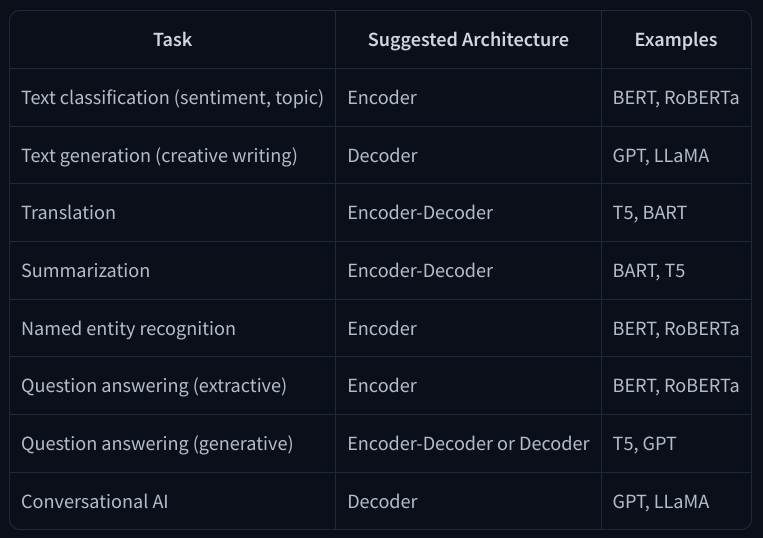



# Inference with LLMs

- Inference: is the process of using a trained LLM to generate human-like text from a given input prompt
- Atention: model allows weight the most relevant words 
- Prompting: structure, context and formulation guide the bests answers 

## Inference process

- Tokenization: convert text in tokens
- Embedding: convert text in vectors with meaning

## Decode

- For each token generated, seen the others token behind 
- Calculate the probabilities (logit) for each possible token
- Apply sample strategies to decide the next token 
- Verify if continues or stop

## Generate strategy 

- Temperature: controls the aleatority of the choice's token 
- Top-k: the most likely words
- Top-p: choice the token with certain probability 
- Penality / Frequency: penalize the word's repetition
- Detection of sentence ending: control how many token generate

## Challenges

### Relevants

- Time to First Token (TTFT)
- Time Pert Output Token (TPOT)
- Throughput 
- VRAM consumption

# Bias and Limitations

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask", model="bert-base-uncased")
result = unmasker("This man works as a [MASK].")
print([r["token_str"] for r in result])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
result = unmasker("This woman works as a [MASK].")
print([r["token_str"] for r in result])